In [1]:
# Import depencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# generate 1500 random lats and lons, pair them with "zip" - creates a zip object in memory as a tuple
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Unpack the lat/lon zip into a list
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

7.352632145766734 -78.50248552034694
12.43067003647073 -113.44317659799313
-54.782603879570644 -167.9806153952039
-34.008336932206824 147.87015581873197
2.0681955716944174 156.43580924001907
-13.18873917101574 -130.17059836647724
46.67346142508356 -53.92129991209768
-21.066494665326204 -34.886597312691606
-88.53376320892868 -170.06474104311084
41.19125957181021 -118.90198944131217
-36.95270467024011 50.785699062650764
21.06644704945667 -126.6390357529354
-60.96950616787114 -139.13201165321544
-22.763781305772866 -32.35557234000299
-54.64022180653882 -55.52546059241901
-40.29597235256002 -6.1499944676768905
-41.35794478909214 -134.79551702276822
-66.86213076387634 -62.952332152729824
-50.71135741537534 -154.65705369943979
77.35798009082467 88.890186826726
88.89243643689036 79.5800114435225
-68.74675322951069 28.904089591677092
30.022032838602357 -126.8483143574511
75.44691212152438 70.49393256159274
57.77640473667907 155.08521104751475
11.533802499960743 21.625449292405904
-32.912249150

In [5]:
# Import citipy
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

78

In [7]:
# Retrieve the data for 500 cities

# Import additional dependencies
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.(results: error message "Nothing to geocode")
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f22af6e6486545604e20f5bfafca49eb


In [11]:
# Loop through all the cities in our list.
# Original code: "for i in range(len(cities)):" changed to "for i, city in enumerate(cities):" to reference the
#   index and the city in the list

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Try and Except block
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | jaque
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | young
Processing Record 5 of Set 1 | namatanai
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | bay roberts
Processing Record 8 of Set 1 | linhares
Processing Record 9 of Set 1 | winnemucca
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | san quintin
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | vila velha
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | yar-sale
Processing Record 22 of Set 1 | tigil
Processing Record 23 of Set 1 | am timan
Processing Record 24 of Set 1 | bus

In [12]:
# ON WITH THE SHOW  Create a DataFrame of City Weather Data
import pandas as pd
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jaque,7.5175,-78.1703,78.39,84,70,2.26,PA,2022-10-29 22:59:36
1,Cabo San Lucas,22.8909,-109.9124,85.60,64,5,3.00,MX,2022-10-29 22:59:06
2,Vaini,-21.2000,-175.2000,80.76,74,20,5.75,TO,2022-10-29 22:59:37
3,Young,-32.6833,-57.6333,67.95,95,53,10.56,UY,2022-10-29 22:59:37
4,Namatanai,-3.6667,152.4333,84.49,68,85,6.80,PG,2022-10-29 22:59:38
5,Atuona,-9.8000,-139.0333,78.15,72,0,15.43,PF,2022-10-29 22:59:38
6,Bay Roberts,47.5999,-53.2648,49.33,82,4,10.00,CA,2022-10-29 22:59:39
7,Linhares,-19.3911,-40.0722,75.45,82,16,9.19,BR,2022-10-29 22:59:39
8,Winnemucca,40.9730,-117.7357,58.75,18,73,3.60,US,2022-10-29 22:59:39
9,San Quintin,30.4833,-115.9500,68.27,68,0,11.41,MX,2022-10-29 22:59:40


In [13]:
# Reorder the columns as prescribed
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jaque,PA,2022-10-29 22:59:36,7.5175,-78.1703,78.39,84,70,2.26
1,Cabo San Lucas,MX,2022-10-29 22:59:06,22.8909,-109.9124,85.60,64,5,3.00
2,Vaini,TO,2022-10-29 22:59:37,-21.2000,-175.2000,80.76,74,20,5.75
3,Young,UY,2022-10-29 22:59:37,-32.6833,-57.6333,67.95,95,53,10.56
4,Namatanai,PG,2022-10-29 22:59:38,-3.6667,152.4333,84.49,68,85,6.80
5,Atuona,PF,2022-10-29 22:59:38,-9.8000,-139.0333,78.15,72,0,15.43
6,Bay Roberts,CA,2022-10-29 22:59:39,47.5999,-53.2648,49.33,82,4,10.00
7,Linhares,BR,2022-10-29 22:59:39,-19.3911,-40.0722,75.45,82,16,9.19
8,Winnemucca,US,2022-10-29 22:59:39,40.9730,-117.7357,58.75,18,73,3.60
9,San Quintin,MX,2022-10-29 22:59:40,30.4833,-115.9500,68.27,68,0,11.41


In [14]:
# Create an output .csv file in a new folder called "weather_data"

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Making Scatter Plots of the weather data
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

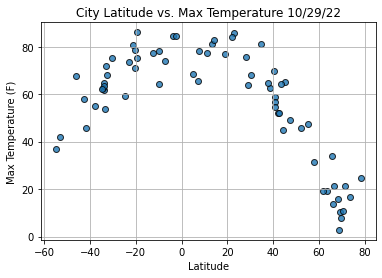

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

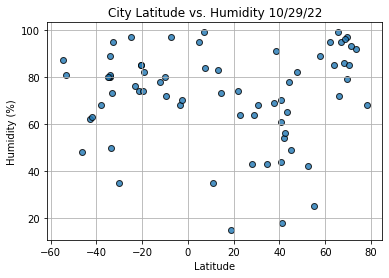

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

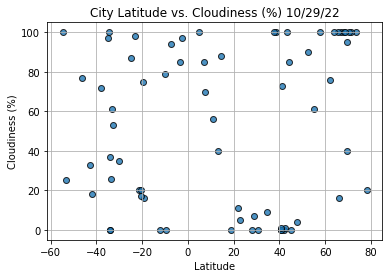

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

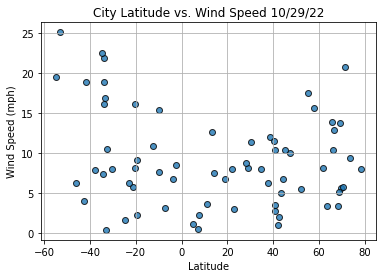

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# LINEAR REGRESSION STUFF
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [23]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

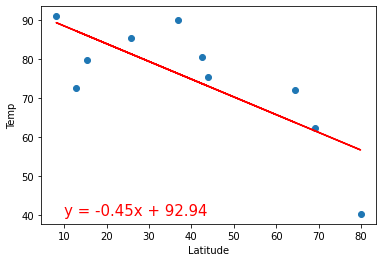

In [24]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Get row 13 data from the city_data dataframe
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2022-10-29 22:59:41
Lat                        42.097
Lng                      -79.2353
Max Temp                    52.05
Humidity                       54
Cloudiness                      0
Wind Speed                   1.01
Name: 13, dtype: object

In [27]:
# Another way to do get data - for latitudes (northern hemisphere) greater or =to 0; loc method with conditional filter
city_data_df.loc[(city_data_df["Lat"] >=0)]
city_data_df.loc[(city_data_df["Lat"] >=0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jaque,PA,2022-10-29 22:59:36,7.5175,-78.1703,78.39,84,70,2.26
1,Cabo San Lucas,MX,2022-10-29 22:59:06,22.8909,-109.9124,85.60,64,5,3.00
6,Bay Roberts,CA,2022-10-29 22:59:39,47.5999,-53.2648,49.33,82,4,10.00
8,Winnemucca,US,2022-10-29 22:59:39,40.9730,-117.7357,58.75,18,73,3.60
9,San Quintin,MX,2022-10-29 22:59:40,30.4833,-115.9500,68.27,68,0,11.41


In [28]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Vaini,TO,2022-10-29 22:59:37,-21.2000,-175.2000,80.76,74,20,5.75
3,Young,UY,2022-10-29 22:59:37,-32.6833,-57.6333,67.95,95,53,10.56
4,Namatanai,PG,2022-10-29 22:59:38,-3.6667,152.4333,84.49,68,85,6.80
5,Atuona,PF,2022-10-29 22:59:38,-9.8000,-139.0333,78.15,72,0,15.43
7,Linhares,BR,2022-10-29 22:59:39,-19.3911,-40.0722,75.45,82,16,9.19


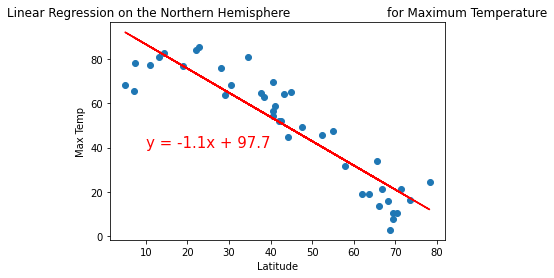

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

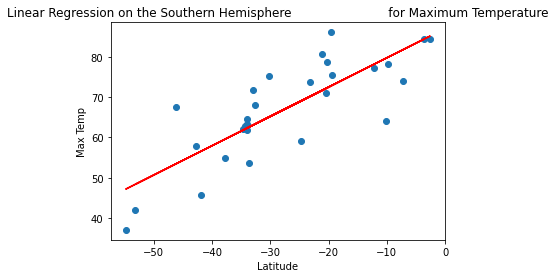

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

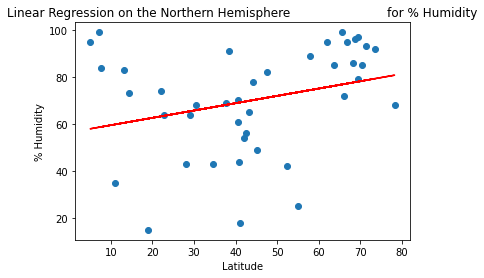

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))